# Rohlik Orders Forecasting Challenge

### Overview

Rohlik Group, a leading European e-grocery innovator, is revolutionising the food retail industry. We operate across 11 warehouses in Czech Republic, Germany, Austria, Hungary, and Romania.

Our challenge focuses on predicting the number of orders (grocery deliveries) at selected warehouses for the next 60 days.

Accurate order forecasts are crucial for planning process, impacting workforce allocation, delivery logistics, inventory management, and supply chain efficiency. By optimizing forecasts, we can minimize waste and streamline operations, making our e-grocery services more sustainable and efficient.

### Data Description
You are provided with historical orders data for selected Rohlik warehouses. The task is to forecast the "orders" column for the test set. Some features are not available in test as they are not known at the moment of making the prediction (e.g. precipitation, shutdown, user activity on website). 

### Files
 - **train.csv** - the training set containing the historical orders data and selected features described below
 - **test.csv** - the test set
 - **solution_example.csv** - a sample submission file in the correct format
 - **train_calendar.csv** - a calendar for the training set containing data about holidays or warehouse specific events, some columns are already in the train data but there are additional rows in this file for dates where some warehouses could be closed due to public holiday or Sunday (and therefore they are not in the train set)
 - **test_calendar.csv** - a calendar for the test set

### Columns
- `warehouse` - warehouse name

- `date` - date

-  **`orders` - number of customer orders attributed to the warehouse**  ==*target variable*==

- `holiday_name` - name of public holiday if any

- `holiday` - 0/1 indicating the presence of holidays

- `shutdown` - warehouse shutdown or limitation due to operations *(not provided in test)*
- `mini_shutdown` - warehouse shutdown or limitation due to operations *(not provided in test)*
- `shops_closed` - public holiday with most of the shops or large part of shops closed
- `winter_school_holidays` - school holidays
- `school_holidays` - school holidays
- `blackout` - warehouse shutdown or limitation due to operations *(not provided in test)*
- `mov_change` - a change in minimum order value indicating potential change in customer behaviour *(not provided in test)*
- `frankfurt_shutdown` - warehouse shutdown or limitation due to operations *(not provided in test)*
- `precipitation` - precipitation in mm around the location of the warehouse which correlates with location of the customers *(not provided in test)*
- `snow`- snowfall in mm around the location of the warehouse which correlates with location of the customers *(not provided in test)*
- `user_activity_1` - user activity on the website *(not provided in test)*
- `user_activity_2` - user activity on the website *(not provided in test)*
- `id` - row id consisting of warehouse name and date

# Exploratory Data Analysis

In [5]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
#from rohlik_forecasting import visualization_setting

In [6]:
# Setting the visualization settings
from rohlik_forecasting.utils import main_utils
main_utils.set_visualization_settings()

In [8]:
os.chdir('../')

In [9]:
%pwd

'/Users/dhruv/PROJECTS/Kaggle_Projects/Rohlik-Orders-Forecasting-Challenge'

### Training Data

In [11]:
df = pd.read_csv('./artifacts/data_ingestion/train.csv')

In [12]:
df.head()

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


In [28]:
main_utils.initial_analysis(df)


 The shape of the dataset:(7340, 18)

 Number of columns in the dataset:18

 Number of rows in the dataset:7340

 Data types in the dataset :
 
warehouse                  object
date                       object
orders                    float64
holiday_name               object
holiday                     int64
shutdown                    int64
mini_shutdown               int64
shops_closed                int64
winter_school_holidays      int64
school_holidays             int64
blackout                    int64
mov_change                float64
frankfurt_shutdown          int64
precipitation             float64
snow                      float64
user_activity_1           float64
user_activity_2           float64
id                         object
dtype: object
*********************************************
 Number of Numerical Features : 14

 Number of Categorical Features : 4
Numerical Features: 
 Index(['orders', 'holiday', 'shutdown', 'mini_shutdown', 'shops_closed',
       'winter_s

<function rohlik_forecasting.utils.main_utils.initial_analysis(dataset)>

In [30]:
categorical_features = ['warehouse', 'holiday_name']
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

warehouse
Prague_1       16.253406
Brno_1         16.253406
Prague_2       16.253406
Prague_3       16.253406
Budapest_1     15.722071
Munich_1       10.694823
Frankfurt_1     8.569482
Name: proportion, dtype: float64
---------------------------
holiday_name
International womens day                                       11.926606
Christmas Eve                                                  10.550459
New Years Day                                                   7.339450
2nd Christmas Day                                               7.339450
Cyrila a Metodej                                                5.504587
Den vzniku samostatneho ceskoslovenskeho statu                  5.504587
Den ceske statnosti                                             5.504587
Jan Hus                                                         5.504587
Den boje za svobodu a demokracii                                5.504587
Den osvobozeni                                                  5.504587
Labour Day 

### Univariate Analysis

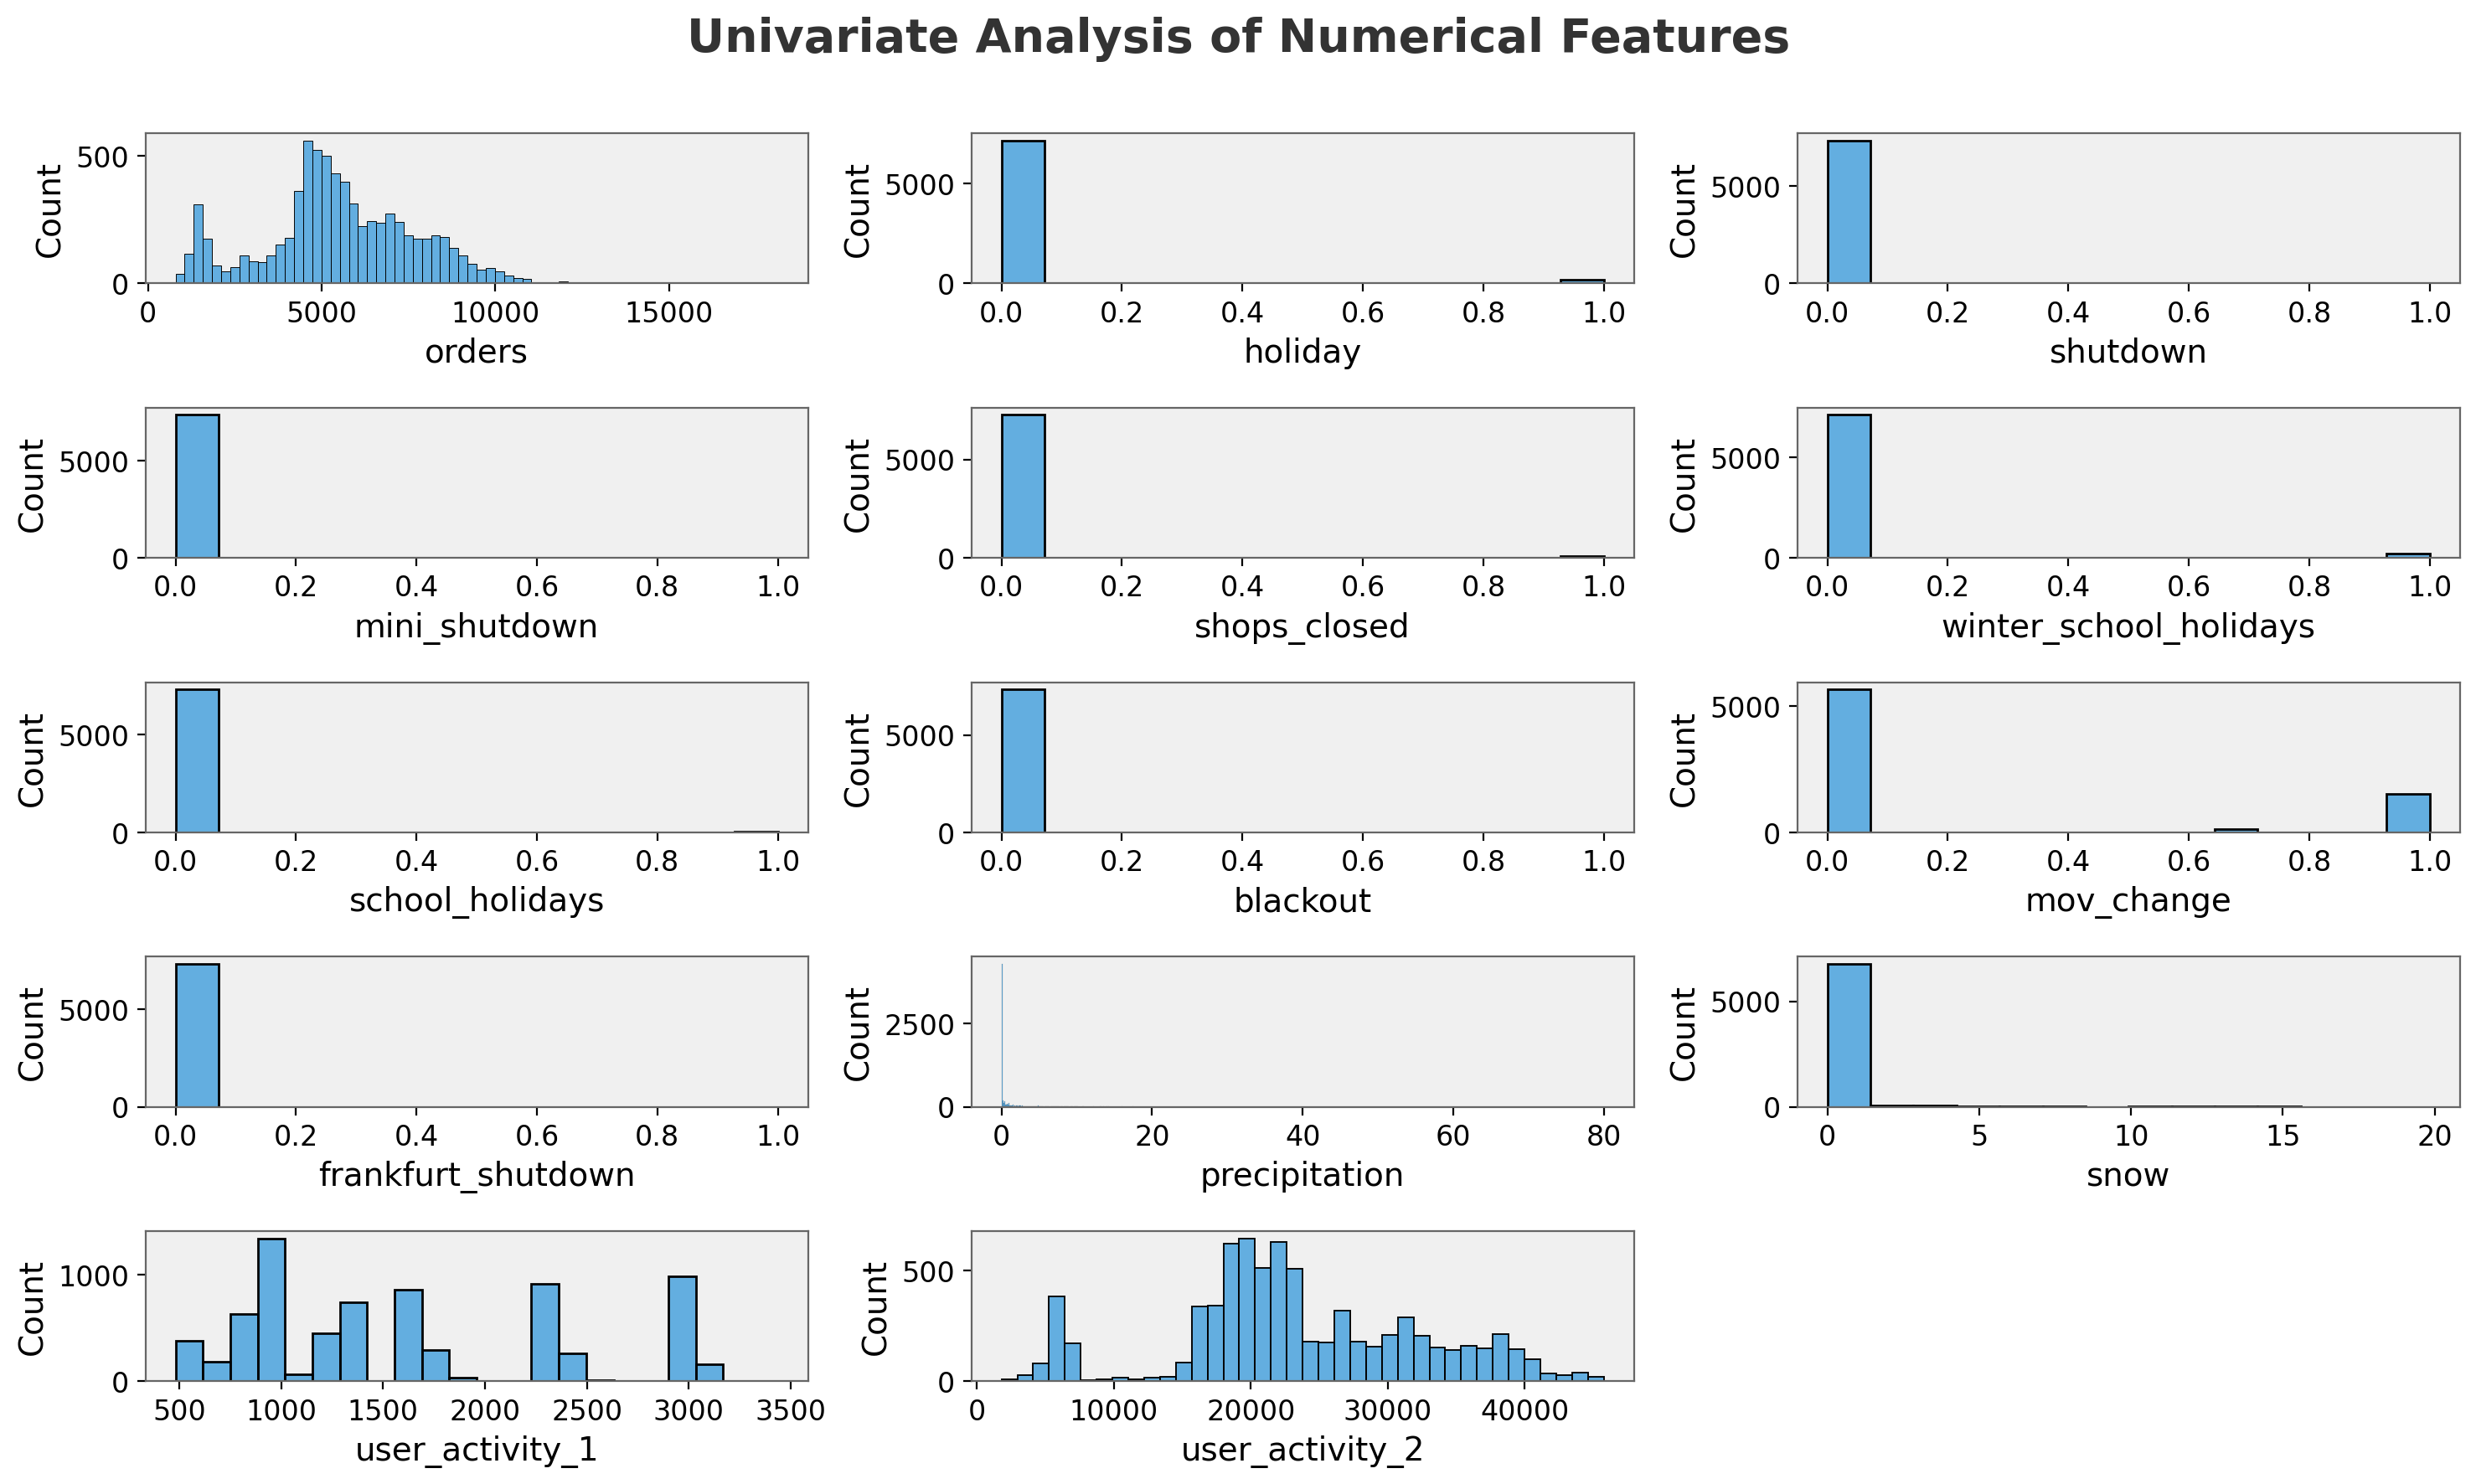

In [44]:
numeric_features = ['orders', 'holiday', 'shutdown', 'mini_shutdown', 'shops_closed',
       'winter_school_holidays', 'school_holidays', 'blackout', 'mov_change',
       'frankfurt_shutdown', 'precipitation', 'snow', 'user_activity_1',
       'user_activity_2'] 

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.histplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

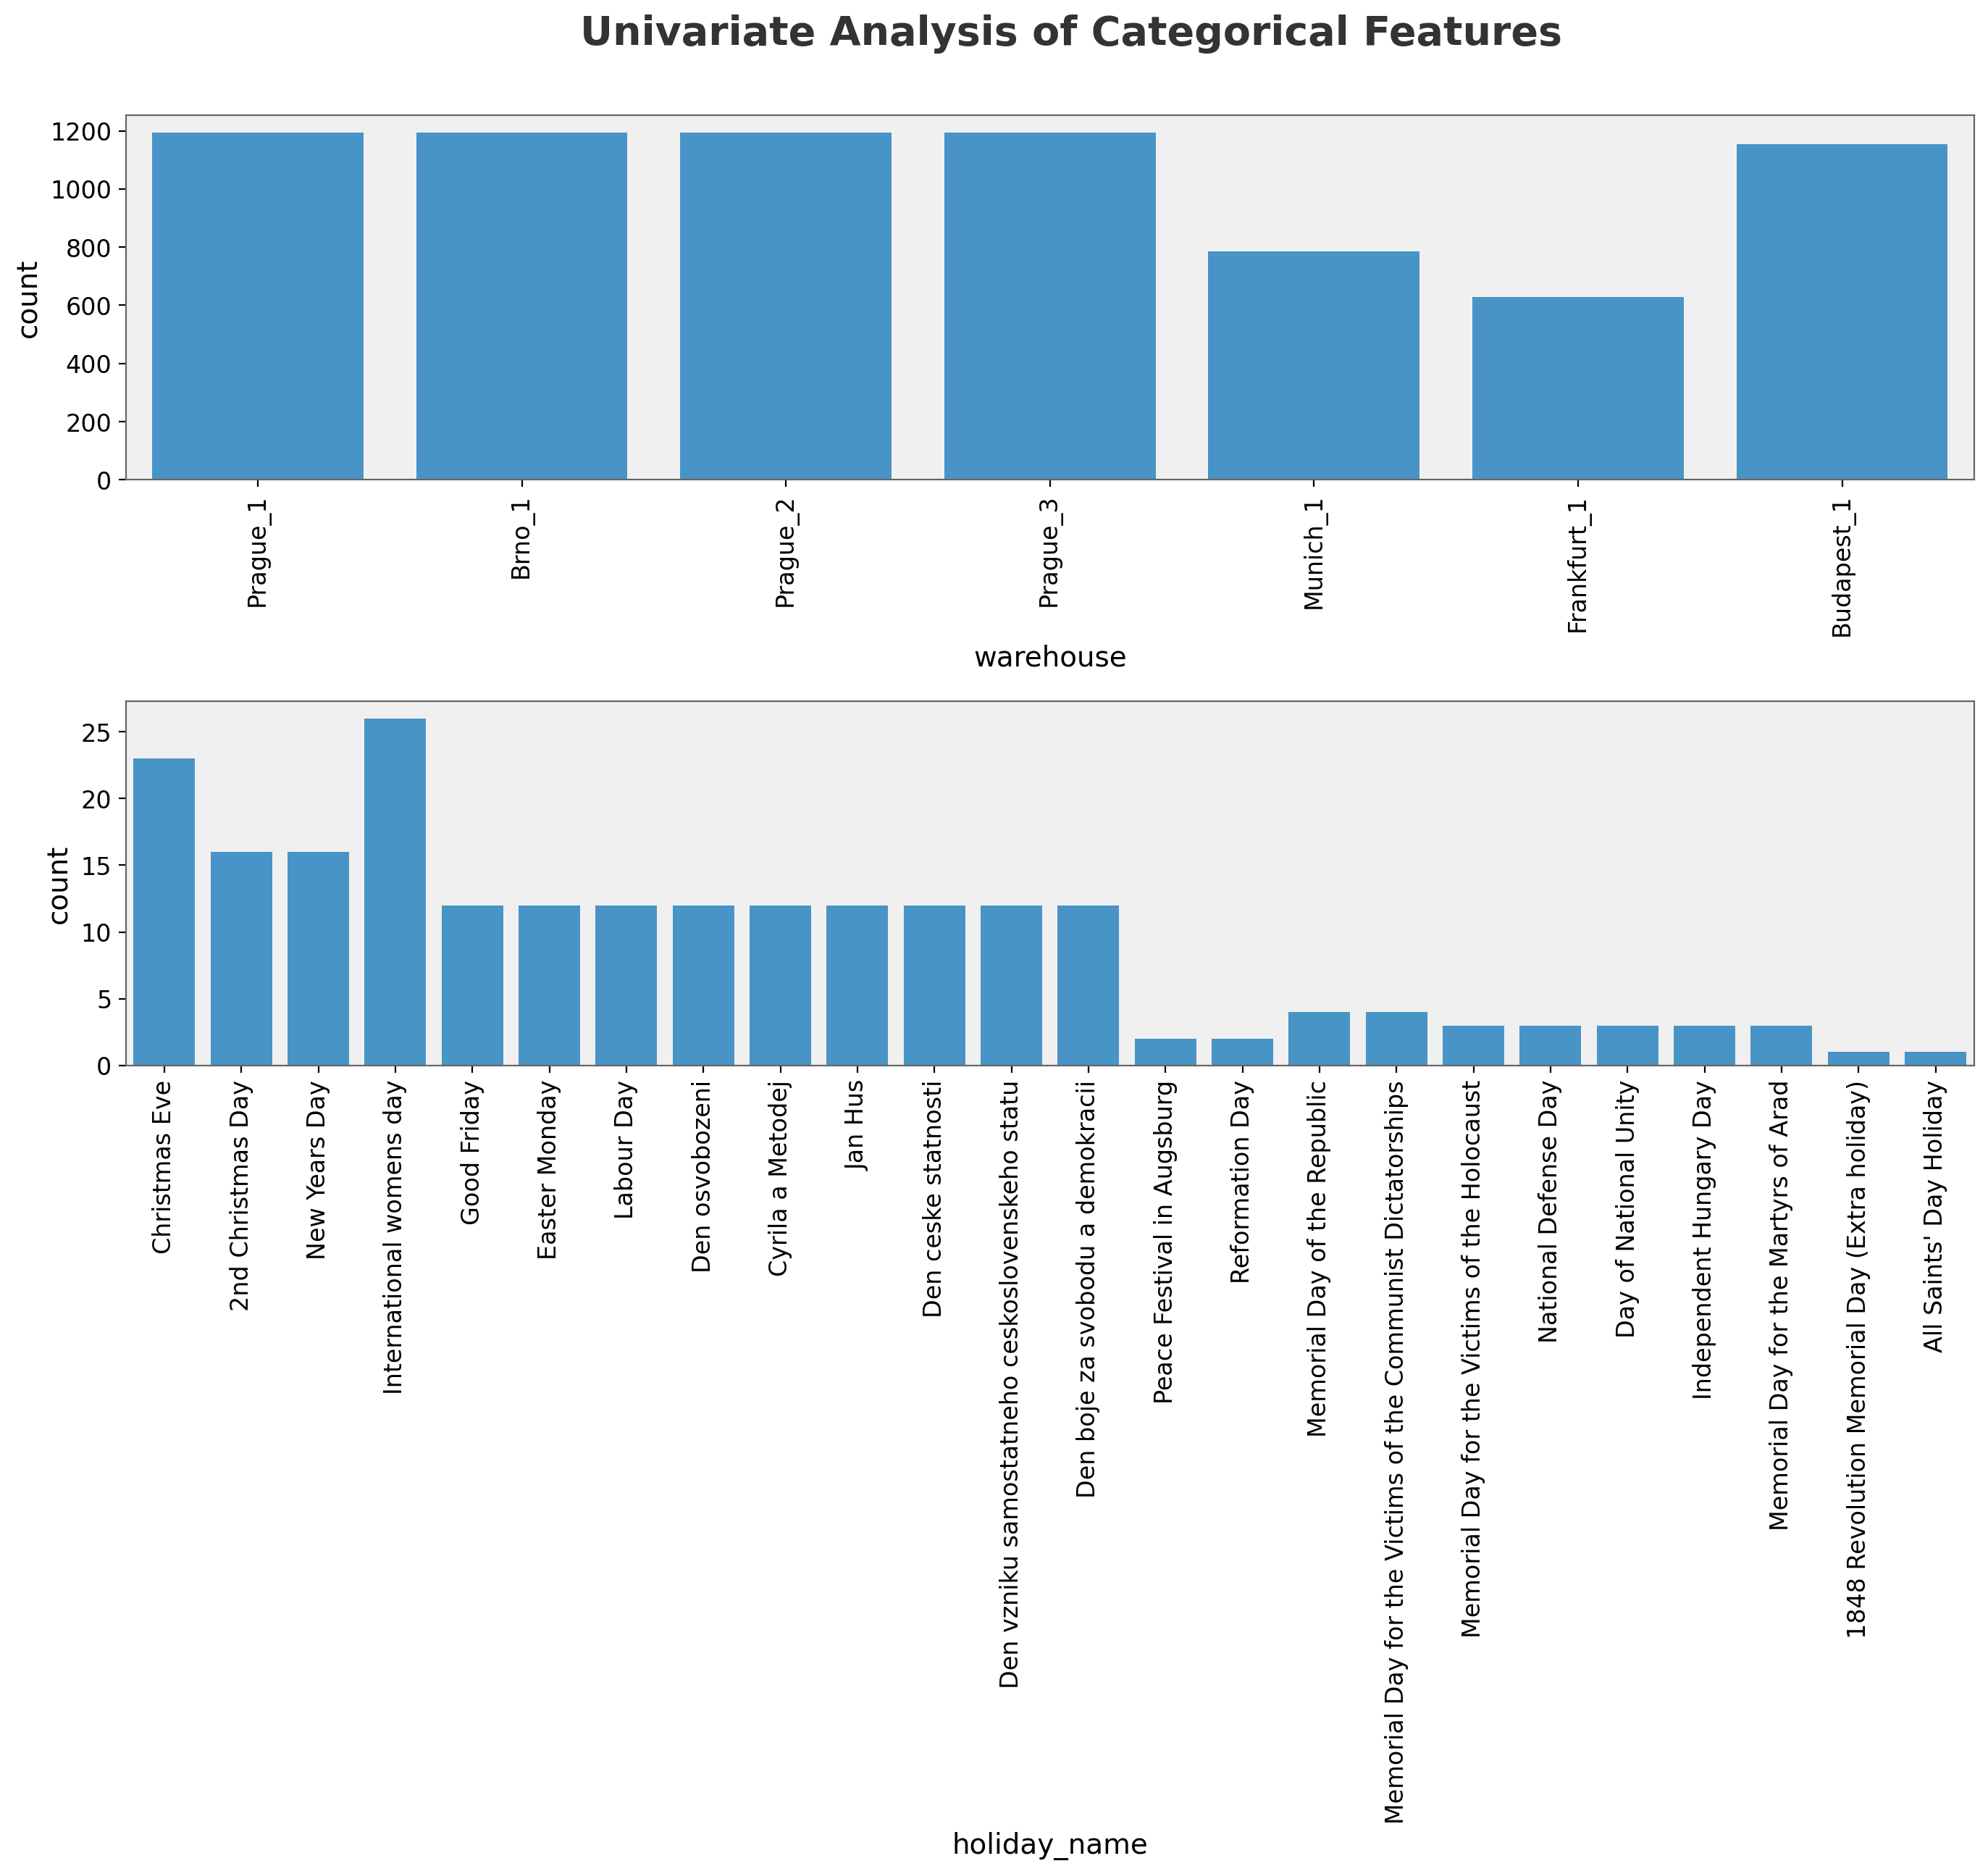

In [38]:
# categorical columns
categorical_features = ['warehouse', 'holiday_name','id']
categorical_features.remove('id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 1, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    plt.xticks(rotation=90)
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

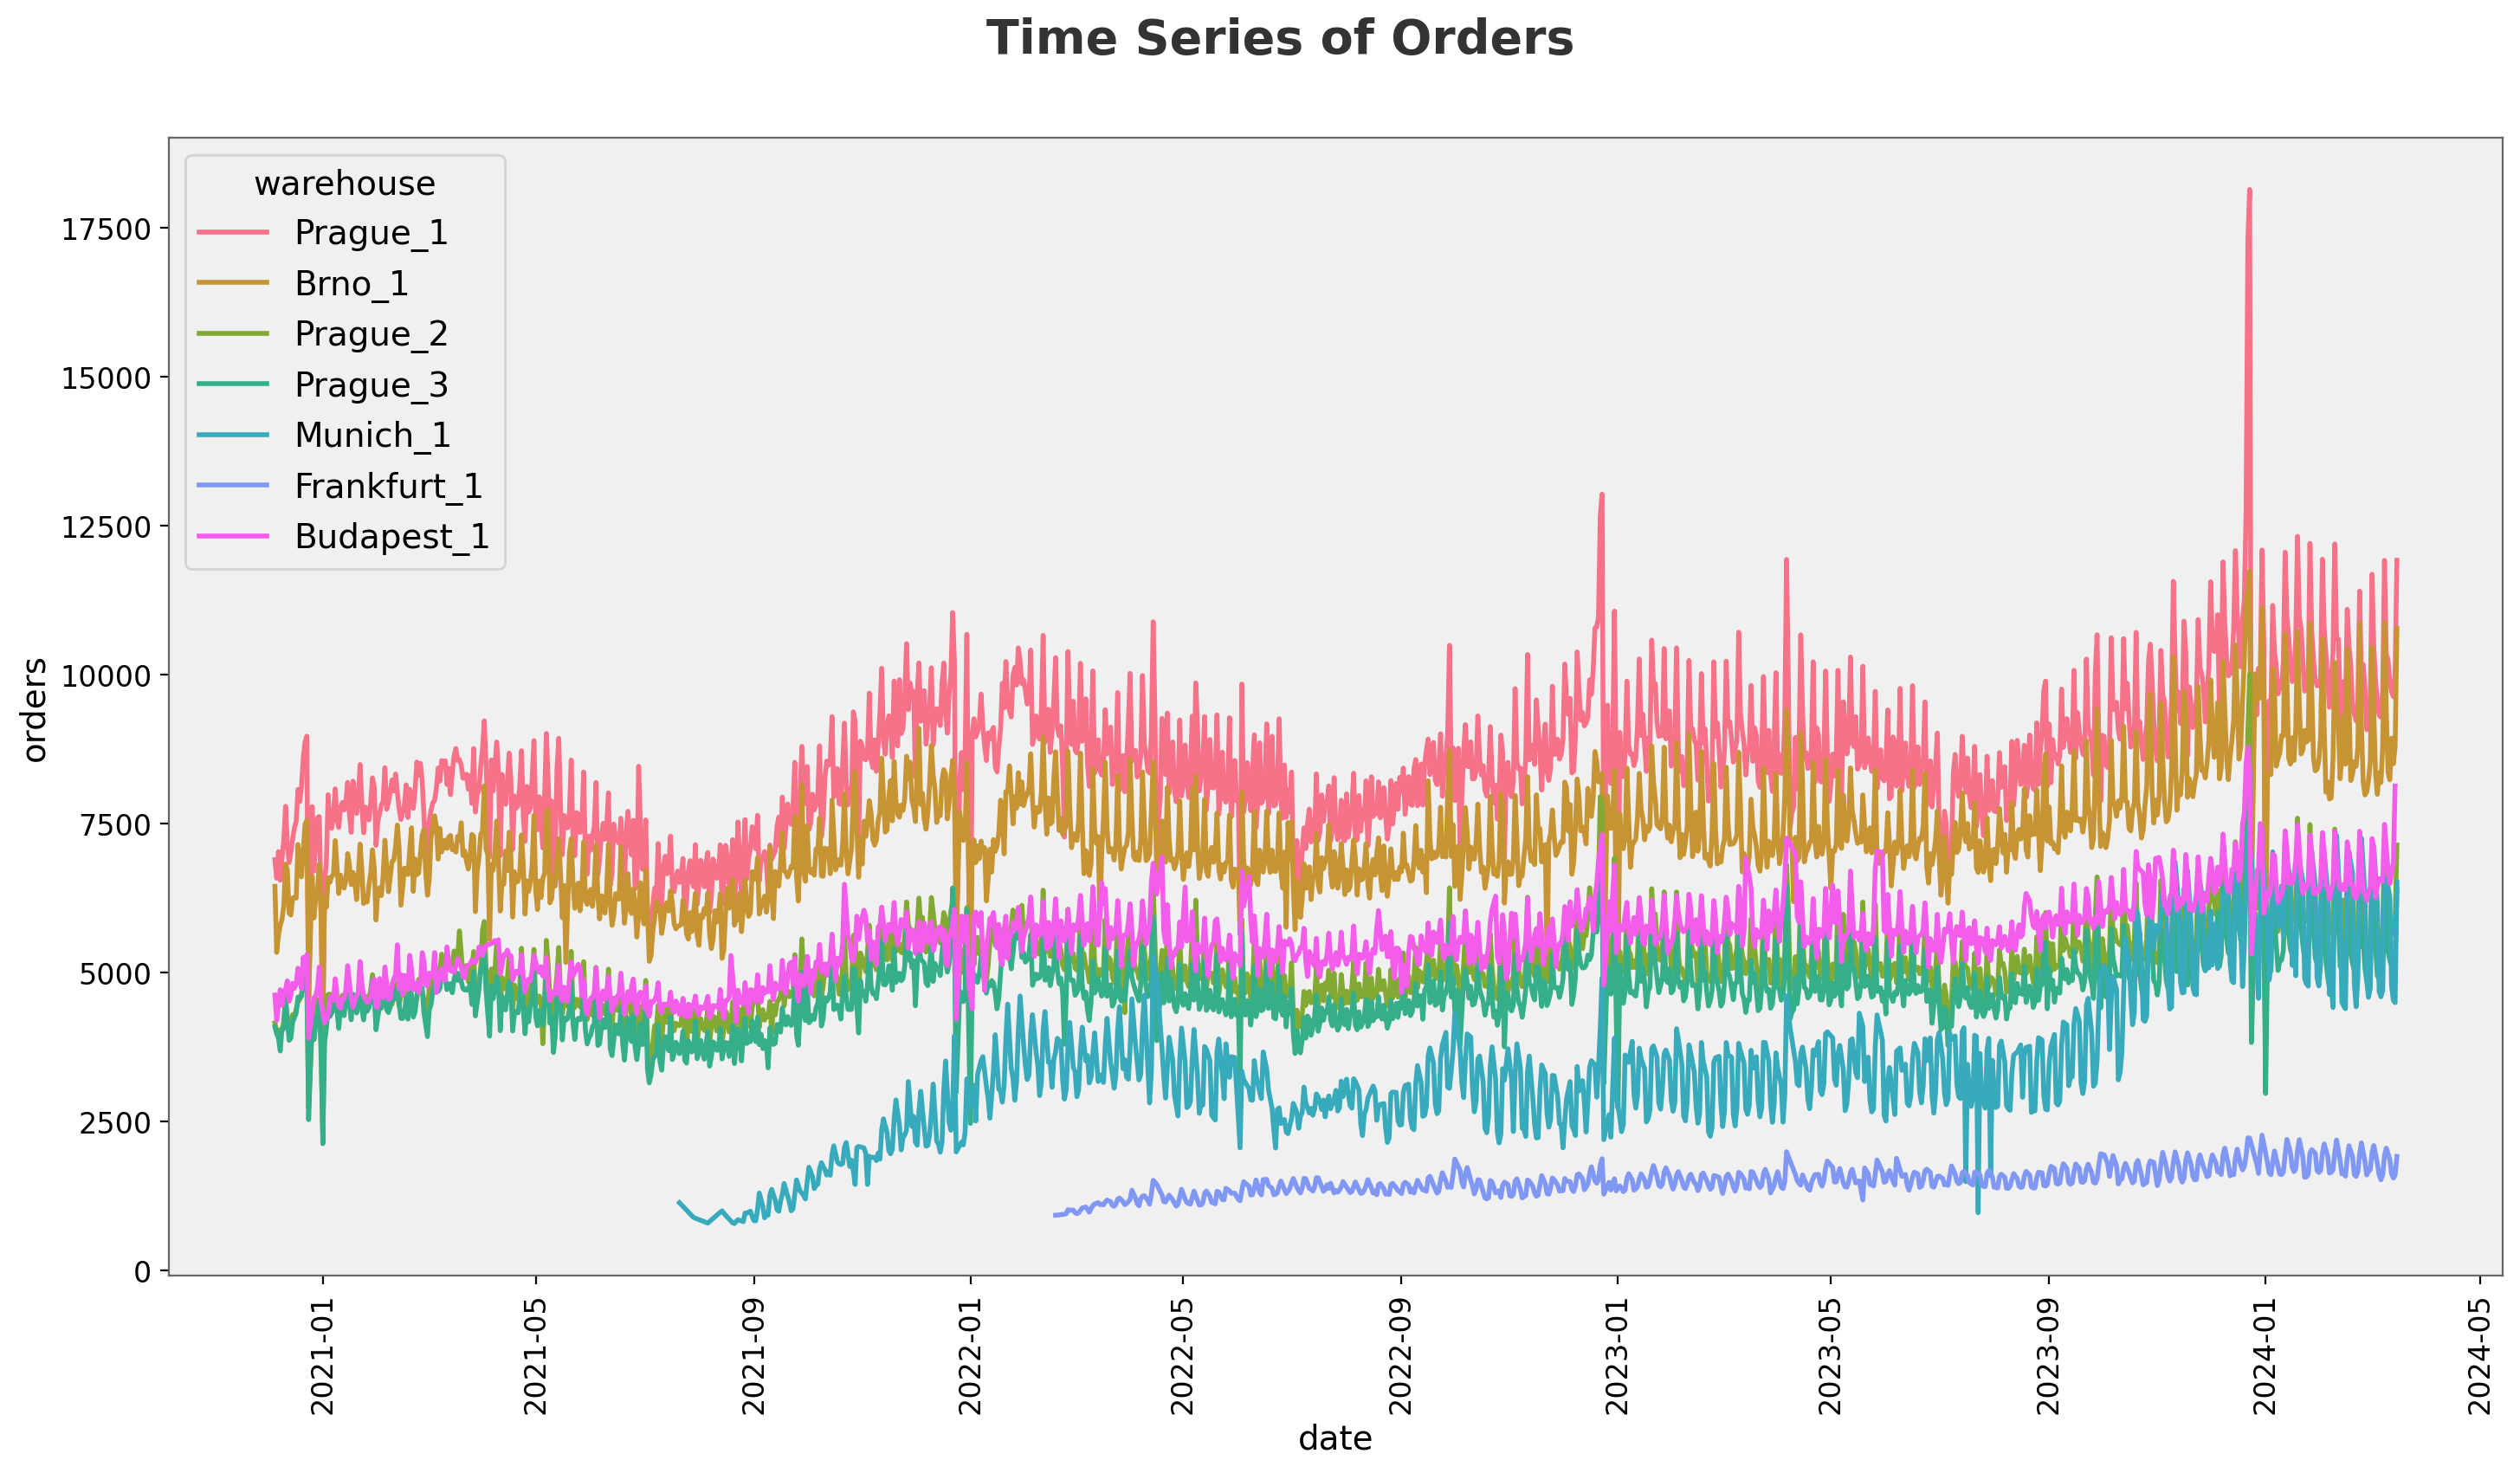

In [43]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(15, 8))
plt.suptitle('Time Series of Orders', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.lineplot(x='date', y='orders', data=df,hue='warehouse')
plt.xlabel('date')
plt.ylabel('orders')
plt.tight_layout()
plt.xticks(rotation=90);

In [20]:
test_df= pd.read_csv('./artifacts/data_ingestion/test.csv') 

In [21]:
test_df.head()

,warehouse,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
0,Prague_1,2024-03-16,NaN,0,0,0,0,Prague_1_2024-03-16
1,Prague_1,2024-03-17,NaN,0,0,0,0,Prague_1_2024-03-17
2,Prague_1,2024-03-18,NaN,0,0,0,0,Prague_1_2024-03-18
3,Prague_1,2024-03-19,NaN,0,0,0,0,Prague_1_2024-03-19
4,Prague_1,2024-03-20,NaN,0,0,0,0,Prague_1_2024-03-20
